# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (*library*) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load dataset
data = pd.read_csv('https://github.com/syahelrusfi21/Meteorite-Landings-Analysis/raw/main/Dataset_inisiasi.csv')
print('Dimensi data:', data.shape)
data.head()

Dimensi data: (35053, 3)


,year,fall,cluster
0,1976.0,Fell,2
1,1974.0,Fell,2
2,2001.0,Fell,2
3,2002.0,Fell,2
4,2008.0,Fell,2


In [3]:
# Display basic info
print('Dataset Info:')
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35053 entries, 0 to 35052
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35053 non-null  float64
 1   fall     35053 non-null  object 
 2   cluster  35053 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 821.7+ KB


In [4]:
# Change data types
data["year"] = data["year"].astype("Int64")
data["fall"] = data["fall"].astype("category")

# Check data types after modification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35053 entries, 0 to 35052
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     35053 non-null  Int64   
 1   fall     35053 non-null  category
 2   cluster  35053 non-null  int64   
dtypes: Int64(1), category(1), int64(1)
memory usage: 616.4 KB


In [5]:
data["fall"] = data["fall"].map({"Fell": 1, "Found": 0}) # Encode "fall" column (Fell = 1, Found = 0)
data.head()

,year,fall,cluster
0,1976,1,2
1,1974,1,2
2,2001,1,2
3,2002,1,2
4,2008,1,2


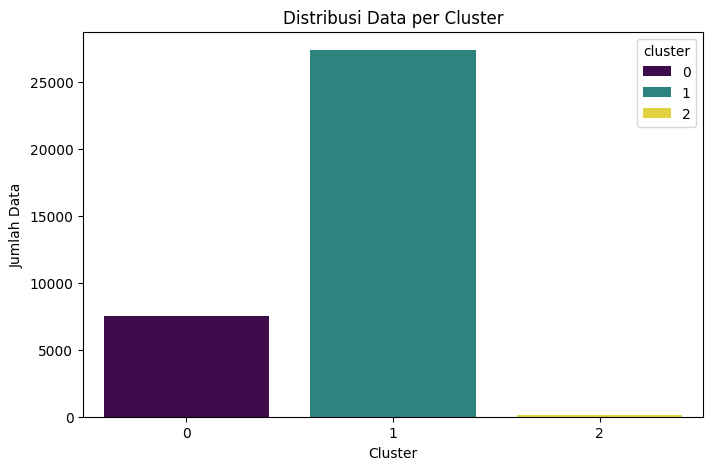

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['cluster'], hue=data['cluster'], palette='viridis')
plt.title('Distribusi Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

Terlihat distribusi data tidak seimbang (*imbalanced*) antara label. Untuk menghindari bias dalam model, maka akan dilakukan teknik oversampling dengan SMOTE.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur dan target
X = data.drop(columns=["cluster"])  # Hapus label cluster dari fitur
y = data["cluster"]  # Gunakan cluster sebagai label

# Bagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur numerik
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from collections import Counter

print("Distribusi label di data latih:", Counter(y_train))
print("Distribusi label di data uji:", Counter(y_test))


Distribusi label di data latih: Counter({1: 21926, 0: 6007, 2: 109})
Distribusi label di data uji: Counter({1: 5482, 0: 1502, 2: 27})


In [9]:
# # Terapkan SMOTE hanya pada data training
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Cek distribusi kelas sebelum dan sesudah oversampling
# print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
# print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [10]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Training pakai data yang sudah di-resample
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
# Inisialisasi model SVM dengan kernel RBF (default)
svm_model = SVC(kernel='rbf', random_state=42, decision_function_shape='ovo')

# Training model
svm_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo', random_state=42)

In [12]:
# Inisialisasi Model Logistic Regression
log_reg = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs', random_state=42)

# Training
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

Pada kasus ini, saya menggunakan tiga algoritma klasifikasi berbeda untuk mengevaluasi performa model dalam mengklasifikasikan dataset. Ketiga algoritma tersebut adalah Logistic Regression, Support Vector Machine (SVM), dan Random Forest.

## **Logistic Regression**
Logistic Regression adalah metode klasifikasi berbasis regresi yang digunakan untuk memprediksi probabilitas suatu kelas berdasarkan hubungan linier antara variabel independen dan dependen. Model ini bekerja dengan menerapkan fungsi sigmoid (logistic function) untuk membatasi output antara 0 dan 1.

**Kelebihan**:
- Sederhana dan cepat untuk diproses.
- Dapat memberikan interpretasi probabilistik dari hasil klasifikasi.
- Bekerja dengan baik untuk dataset yang relatif terstruktur.

**Kekurangan**:
- Kurang optimal jika hubungan antara fitur tidak linier.
- Tidak bekerja baik jika terdapat banyak fitur yang saling berkorelasi tinggi (multikolinearitas).

## **Support Vector Machine (SVM)**
Support Vector Machine adalah algoritma klasifikasi yang mencari hyperplane optimal untuk memisahkan data ke dalam kelas-kelas berbeda. SVM menggunakan konsep margin maksimal, di mana model mencari garis pemisah yang memberikan jarak terbesar terhadap titik-titik data terdekat dari setiap kelas (support vectors).

**Kelebihan**:
- Efektif untuk dataset dengan dimensi tinggi.
- Bekerja dengan baik untuk data yang tidak terpisah secara linier dengan menggunakan kernel trick.
- Tidak mudah terpengaruh oleh outlier karena hanya mempertimbangkan support vectors.

**Kekurangan**:
- Relatif lambat untuk dataset besar.
- Sulit untuk diinterpretasikan karena hasilnya berbasis vektor dalam ruang multidimensi.

## **Random Forest**
Random Forest adalah algoritma berbasis ensemble learning yang terdiri dari banyak decision tree. Model ini bekerja dengan membangun beberapa decision tree secara acak dan kemudian mengambil rata-rata dari hasil prediksi (untuk regresi) atau melakukan voting mayoritas (untuk klasifikasi).

**Kelebihan**:
- Mengurangi overfitting dibandingkan dengan single decision tree.
- Mampu menangani data dengan banyak fitur dan bekerja dengan baik untuk dataset yang kompleks.
- Dapat menangani missing values dan dataset yang tidak terdistribusi dengan baik.

**Kekurangan**:
- Lebih lambat dibandingkan dengan algoritma sederhana seperti Logistic Regression.
- Sulit untuk diinterpretasikan karena terdiri dari banyak pohon keputusan.

## **b. Evaluasi Model Klasifikasi**

In [13]:
# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf) # Confusion Matrix
print("Confusion Matrix:\n", cm_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')  # F1-score weighted
rf_acc = accuracy_score(y_test, y_pred_rf)  # Akurasi

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Random Forest F1-score: {rf_f1:.4f}")

Confusion Matrix:
 [[1502    0    0]
 [   0 5482    0]
 [   0    0   27]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      1.00      1.00      5482
           2       1.00      1.00      1.00        27

    accuracy                           1.00      7011
   macro avg       1.00      1.00      1.00      7011
weighted avg       1.00      1.00      1.00      7011

Random Forest Accuracy: 1.0000
Random Forest F1-score: 1.0000


In [14]:
# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM
cm_svm = confusion_matrix(y_test, y_pred_svm) # Confusion Matrix
print("Confusion Matrix:\n", cm_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Cetak Accuracy & F1-Score
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM F1-Score: {svm_f1}")

Confusion Matrix:
 [[1502    0    0]
 [   0 5482    0]
 [   0    0   27]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      1.00      1.00      5482
           2       1.00      1.00      1.00        27

    accuracy                           1.00      7011
   macro avg       1.00      1.00      1.00      7011
weighted avg       1.00      1.00      1.00      7011

SVM Accuracy: 1.0
SVM F1-Score: 1.0


In [15]:
# Prediksi
y_pred_log = log_reg.predict(X_test)

# Evaluasi model logistic
cm = confusion_matrix(y_test, y_pred_log) # Confusion Matrix
print("Confusion Matrix:\n", cm)
print("Logistic Regression with GridSearchCV Classification Report:")
print(classification_report(y_test, y_pred_log))

# Cetak Accuracy & F1-Score
logreg_accuracy = accuracy_score(y_test, y_pred_log)
logreg_f1_score = f1_score(y_test, y_pred_log, average='weighted')

print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression F1-score: {logreg_f1_score:.4f}")

Confusion Matrix:
 [[1440   62    0]
 [   0 5482    0]
 [   0    3   24]]
Logistic Regression with GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1502
           1       0.99      1.00      0.99      5482
           2       1.00      0.89      0.94        27

    accuracy                           0.99      7011
   macro avg       1.00      0.95      0.97      7011
weighted avg       0.99      0.99      0.99      7011

Logistic Regression Accuracy: 0.9907
Logistic Regression F1-score: 0.9907


- Random Forest dan SVM memiliki akurasi sempurna (100%) dengan precision, recall, dan f1-score juga 100% di semua kelas. Confusion Matrix menunjukkan tidak ada kesalahan klasifikasi, menandakan model membedakan setiap kelas dengan sempurna. Kemungkinan besar, model terlalu kuat dalam menangkap pola data karena strukturnya memungkinkan pemisahan yang jelas. Namun, perlu diwaspadai potensi overfitting.

- Logistic Regression memiliki akurasi 99.07% dan F1-score 0.9907, sedikit lebih rendah dibandingkan Random Forest dan SVM. Confusion Matrix menunjukkan beberapa kesalahan klasifikasi: 62 sampel kelas 0 diprediksi sebagai kelas 1, dan 3 sampel kelas 2 diprediksi sebagai kelas 1. Meskipun ada kesalahan minor, performanya tetap sangat baik. Hal ini kemungkinan karena Logistic Regression adalah model linear, sehingga kurang fleksibel dalam menangkap hubungan non-linear dibandingkan Random Forest dan SVM.

## **c. Tuning Model Klasifikasi (Optional)**

In [16]:
# Definisi parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam forest
    'max_depth': [None, 10, 20],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Minimum jumlah sample untuk split node
    'min_samples_leaf': [1, 2, 4],  # Minimum jumlah sample per daun
}

# GridSearchCV dengan cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [17]:
# 1️⃣ GridSearchCV untuk SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print(f"Best Parameters SVM: {svm_grid.best_params_}")

Best Parameters SVM: {'C': 0.1, 'kernel': 'poly'}


In [18]:
# 2️⃣ GridSearchCV untuk Logistic Regression
logreg_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

logreg_grid = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print(f"Best Parameters Logistic Regression: {logreg_grid.best_params_}")

Best Parameters Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [19]:
# Menggunakan model terbaik untuk prediksi
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi model
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf) # Confusion Matrix
print("Confusion Matrix:\n", cm_best_rf)
rf_f1_best = f1_score(y_test, y_pred_best_rf, average='weighted')
rf_acc_best = accuracy_score(y_test, y_pred_best_rf)

print("Random Forest with GridSearchCV Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print(f"Random Forest Accuracy: {rf_acc_best:.4f}")
print(f"Random Forest F1-score: {rf_f1_best:.4f}")

Confusion Matrix:
 [[1502    0    0]
 [   0 5482    0]
 [   0    0   27]]
Random Forest with GridSearchCV Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      1.00      1.00      5482
           2       1.00      1.00      1.00        27

    accuracy                           1.00      7011
   macro avg       1.00      1.00      1.00      7011
weighted avg       1.00      1.00      1.00      7011

Random Forest Accuracy: 1.0000
Random Forest F1-score: 1.0000


In [20]:
# Menggunakan model terbaik untuk prediksi
best_svm = svm_grid.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluasi model
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm) # Confusion Matrix
print("Confusion Matrix:\n", cm_best_svm)
svm_f1_best = f1_score(y_test, y_pred_best_svm, average='weighted')
svm_acc_best = accuracy_score(y_test, y_pred_best_svm)

print("SVM with GridSearchCV Classification Report:\n", classification_report(y_test, y_pred_best_svm))
print(f"SVM Accuracy: {svm_acc_best:.4f}")
print(f"SVM F1-score: {svm_f1_best:.4f}")

Confusion Matrix:
 [[1502    0    0]
 [   0 5482    0]
 [   0    0   27]]
SVM with GridSearchCV Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      1.00      1.00      5482
           2       1.00      1.00      1.00        27

    accuracy                           1.00      7011
   macro avg       1.00      1.00      1.00      7011
weighted avg       1.00      1.00      1.00      7011

SVM Accuracy: 1.0000
SVM F1-score: 1.0000


In [21]:
# Menggunakan model terbaik untuk prediksi
best_logreg = logreg_grid.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)

# Evaluasi model
cm_best_logreg = confusion_matrix(y_test, y_pred_best_logreg) # Confusion Matrix
print("Confusion Matrix:\n", cm_best_logreg)
logreg_f1_best = f1_score(y_test, y_pred_best_logreg, average='weighted')
logreg_acc_best = accuracy_score(y_test, y_pred_best_logreg)

print("Logistic Regression with GridSearchCV Classification Report:\n", classification_report(y_test, y_pred_best_logreg))
print(f"Logistic Regression Accuracy: {logreg_acc_best:.4f}")
print(f"Logistic Regression F1-score: {logreg_f1_best:.4f}")

Confusion Matrix:
 [[1502    0    0]
 [   0 5482    0]
 [   0    0   27]]
Logistic Regression with GridSearchCV Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      1.00      1.00      5482
           2       1.00      1.00      1.00        27

    accuracy                           1.00      7011
   macro avg       1.00      1.00      1.00      7011
weighted avg       1.00      1.00      1.00      7011

Logistic Regression Accuracy: 1.0000
Logistic Regression F1-score: 1.0000


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Random Forest, SVM, dan Logistic Regression setelah GridSearchCV menunjukkan akurasi sempurna (100%), dengan precision, recall, dan f1-score juga mencapai 100% di semua kelas. Confusion Matrix menunjukkan tidak ada kesalahan klasifikasi, menandakan semua sampel berhasil diklasifikasikan dengan benar.

2. Dampak Hyperparameter Tuning: Sebelum tuning, Logistic Regression memiliki sedikit kesalahan klasifikasi, tetapi setelah optimasi, model ini juga mencapai akurasi 100%. Ini menunjukkan bahwa tuning parameter sangat meningkatkan performa model, terutama pada Logistic Regression.

3. Adanya potensi Overfitting: Meskipun hasil ini terlihat ideal, akurasi yang terlalu sempurna bisa menjadi indikasi overfitting. Model mungkin terlalu spesifik terhadap data latih dan kurang dapat digeneralisasi ke data baru. Hal ini mungkin perlu divalidasi lebih lanjut dengan uji coba pada dataset baru yang benar-benar belum ada dalam dataset latih maupun uji, dan disertai dengan pemahaman dari manusia, apakah hasil klasifikasi masuk akal atau tidak.

4. Perlu dicatat bahwa dataset ini memiliki proporsi kelas yang tidak seimbang (*imbalanced*), dan telah dilakukan oversampling menggunakan teknik SMOTE. Namun, hasil evaluasi menunjukkan bahwa oversampling tidak memberikan perbedaan signifikan dibandingkan tanpa oversampling. Oleh karena itu, diputuskan untuk tidak menggunakannya. Meski demikian, teknik ini tetap dapat dipertimbangkan untuk eksplorasi lebih lanjut jika diperlukan.